# Mini Project 2 – Consumer Complaint Resolution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
train_data = pd.read_csv("Consumer_Complaints_train.csv")
test_data = pd.read_csv("Consumer_Complaints_test.csv")
train_data.head()
test_data.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [2]:
# Check the data type for both data (test file and train file)
print(len(train_data. axes[0]))
print(len(test_data. axes[0]))
print(train_data.dtypes)
print(test_data.dtypes)


358810
119606
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         obje

In [3]:
# Drop columns where more than 25% of data are missing
train_data = train_data.dropna(thresh=train_data.shape[0]*0.75, axis=1)
test_data = test_data.dropna(thresh=test_data.shape[0]*0.75, axis=1)
train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [4]:
# convert 'Date ' column to datetime format

train_data['Date received'] = pd.to_datetime(train_data['Date received'])
test_data['Date received'] = pd.to_datetime(test_data['Date received'])

# Extract Day, Month, and Year from Date Received Column and create new fields for month, year, and day
# Create new fields for month, year, and day in both the test and train data
train_data["Month"] = train_data["Date received"].dt.month
train_data["Year"] = train_data["Date received"].dt.year
train_data["Day"] = train_data["Date received"].dt.day

test_data["Month"] = test_data["Date received"].dt.month
test_data["Year"] = test_data["Date received"].dt.year
test_data["Day"] = test_data["Date received"].dt.day
train_data.head()


,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Month,Year,Day
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,10,2015,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,4,2015,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,12,2013,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,2016,3
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,1,2015,30


In [5]:
# Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”
train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])
test_data['Date sent to company'] = pd.to_datetime(test_data['Date sent to company'])
train_data['days_held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days
test_data['days_held'] = (test_data['Date sent to company'] - test_data['Date received']).dt.days
train_data

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Month,Year,Day,days_held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,10,2015,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,4,2015,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,12,2013,20,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,2016,3,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,1,2015,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,4,2014,14,-1
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,3,2013,14,4
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2,2013,1,0
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,6,2015,25,4


In [6]:
# Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields
train_data = train_data.drop(["Date sent to company","ZIP code","Complaint ID"], axis=1)
test_data = test_data.drop(["Date sent to company","ZIP code","Complaint ID"], axis=1)
train_data

,Date received,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Year,Day,days_held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,20,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,3,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,4,2014,14,-1
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,3,2013,14,4
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2,2013,1,0
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,6,2015,25,4


In [7]:
# Imputing Null value in “State” by Mode
train_data["State"].fillna(train_data["State"].mode()[0], inplace=True)
test_data["State"].fillna(test_data["State"].mode()[0], inplace=True)
test_data["Day"].dtypes

dtype('int64')

In [8]:
# with the help of the days we calculated above, create a new field 'Week_Received' where we calculate the week based on the day of receiving
train_data = train_data.assign(week_received=train_data['Date received'].dt.week)
test_data = test_data.assign(week_received=test_data['Date received'].dt.week)
test_data.head()


C:\Users\Vishnu\AppData\Local\Temp\ipykernel_10784\2910041585.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_data = train_data.assign(week_received=train_data['Date received'].dt.week)
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_10784\2910041585.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_data = test_data.assign(week_received=test_data['Date received'].dt.week)


,Date received,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Month,Year,Day,days_held,week_received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,1,2015,17,0,3
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,6,2016,22,0,25
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,9,2015,4,0,36
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,2016,17,3,20
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,2016,7,0,27


In [9]:
#store data of disputed people into the “disputed_cons” variable for future tasks
disputed_cons = train_data[train_data["Consumer disputed?"] == "Yes"]


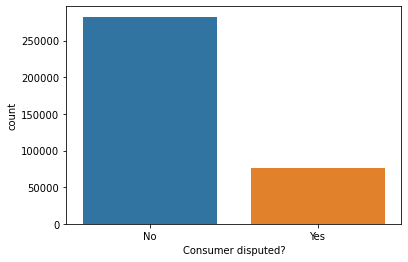

In [10]:
#Plot bar graph of the total no of disputes of consumers with the help of seaborn
import seaborn as sns
sns.countplot(x="Consumer disputed?", data=train_data)
plt.show()

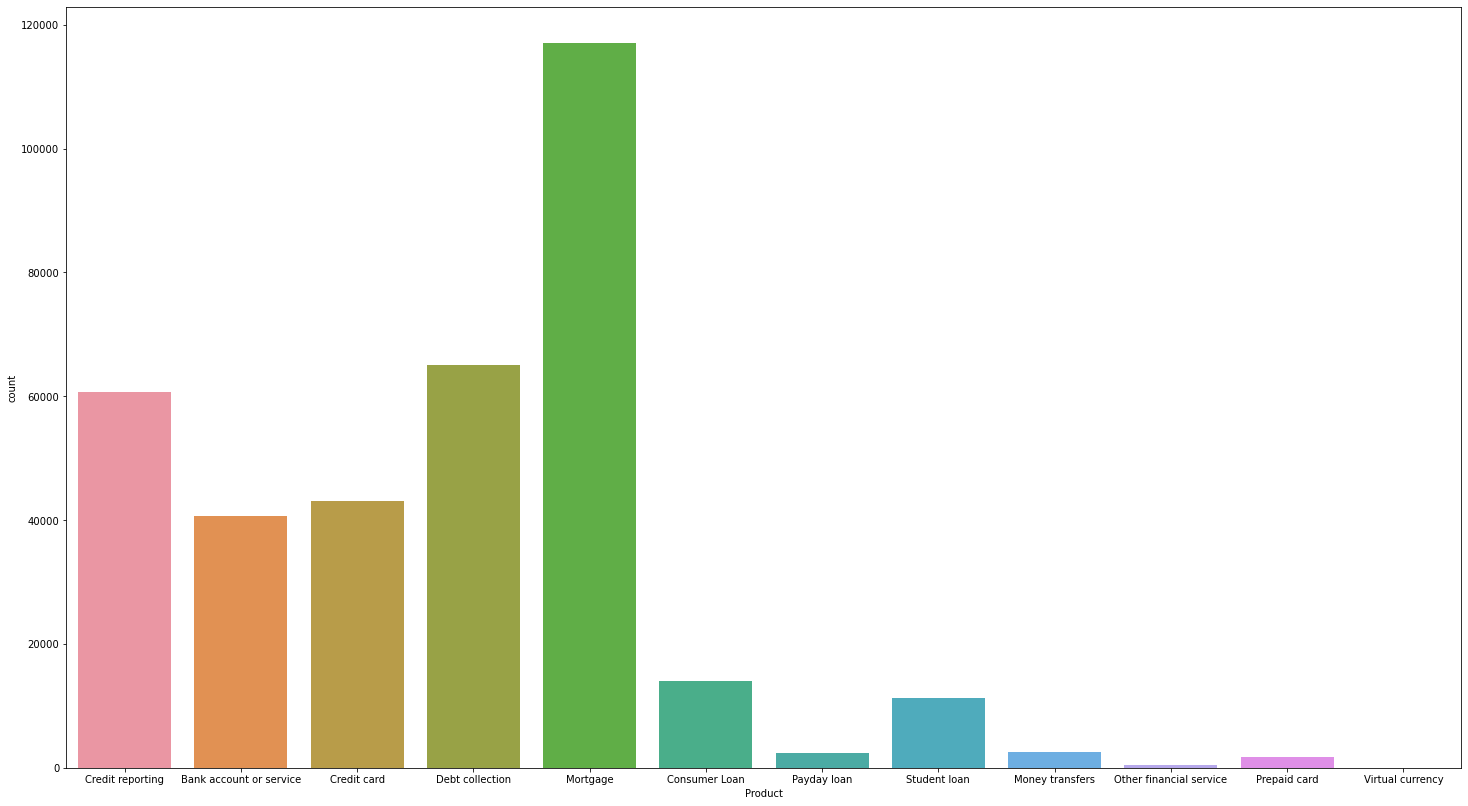

In [11]:
#Plot bar graph of the total no of disputes products-wise with the help of seaborn
fig, ax = plt.subplots(figsize=(25, 14))
sns.countplot(x="Product", data=train_data)
plt.show()

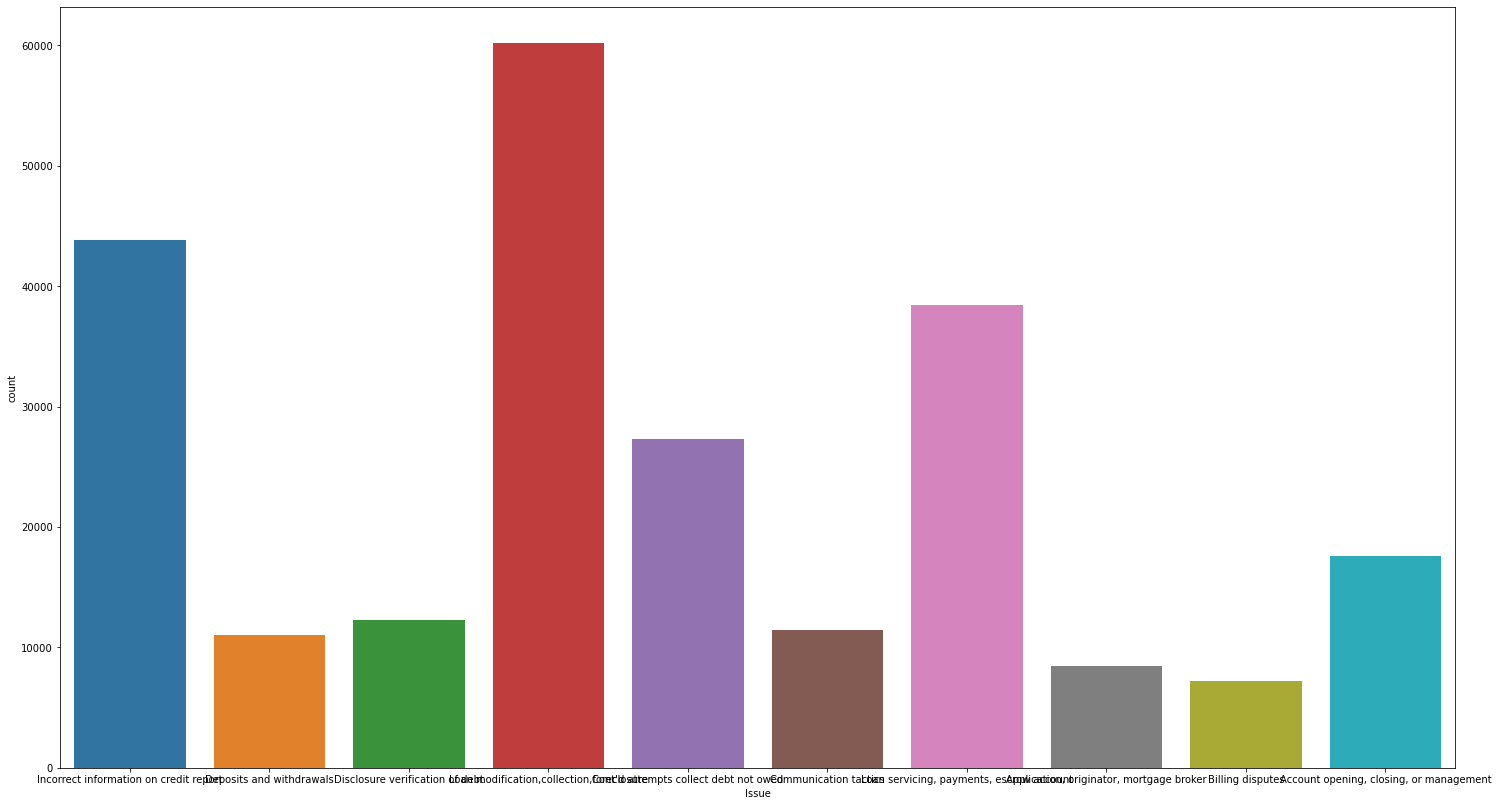

In [12]:

#Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn
top_issues = train_data.groupby('Issue').size().nlargest(10)

fig, ax = plt.subplots(figsize=(25, 14))

sns.countplot(x="Issue", data=train_data[train_data['Issue'].isin(top_issues.index)], ax=ax)
plt.show()

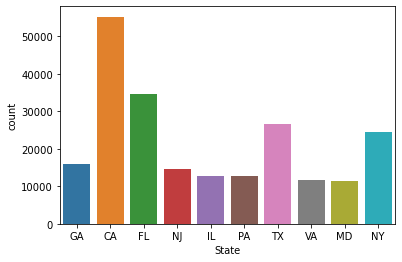

In [13]:
# Find the states with the highest number of disputes
max_disputes_states = train_data["State"].value_counts().head(10)

# Plot a bar graph of the total number of disputes by state with maximum disputes
sns.countplot(x="State", data=train_data[train_data["State"].isin(max_disputes_states.index)])
plt.show()

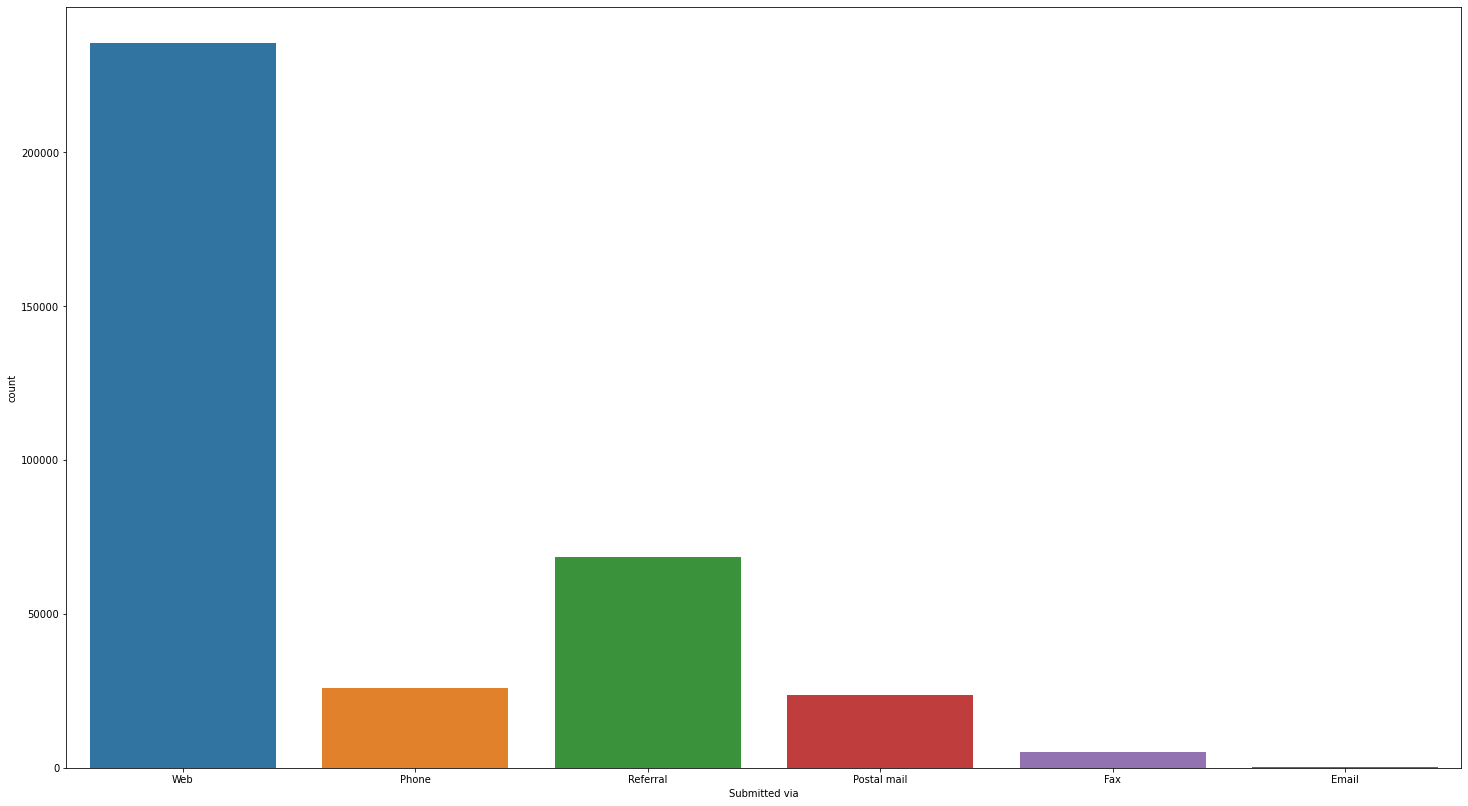

In [14]:
#Plot bar graph for the total no of disputes by Submitted Via diffrent source
fig, ax = plt.subplots(figsize=(25, 14))
sns.countplot(x="Submitted via", data=train_data, ax= ax)
plt.show()

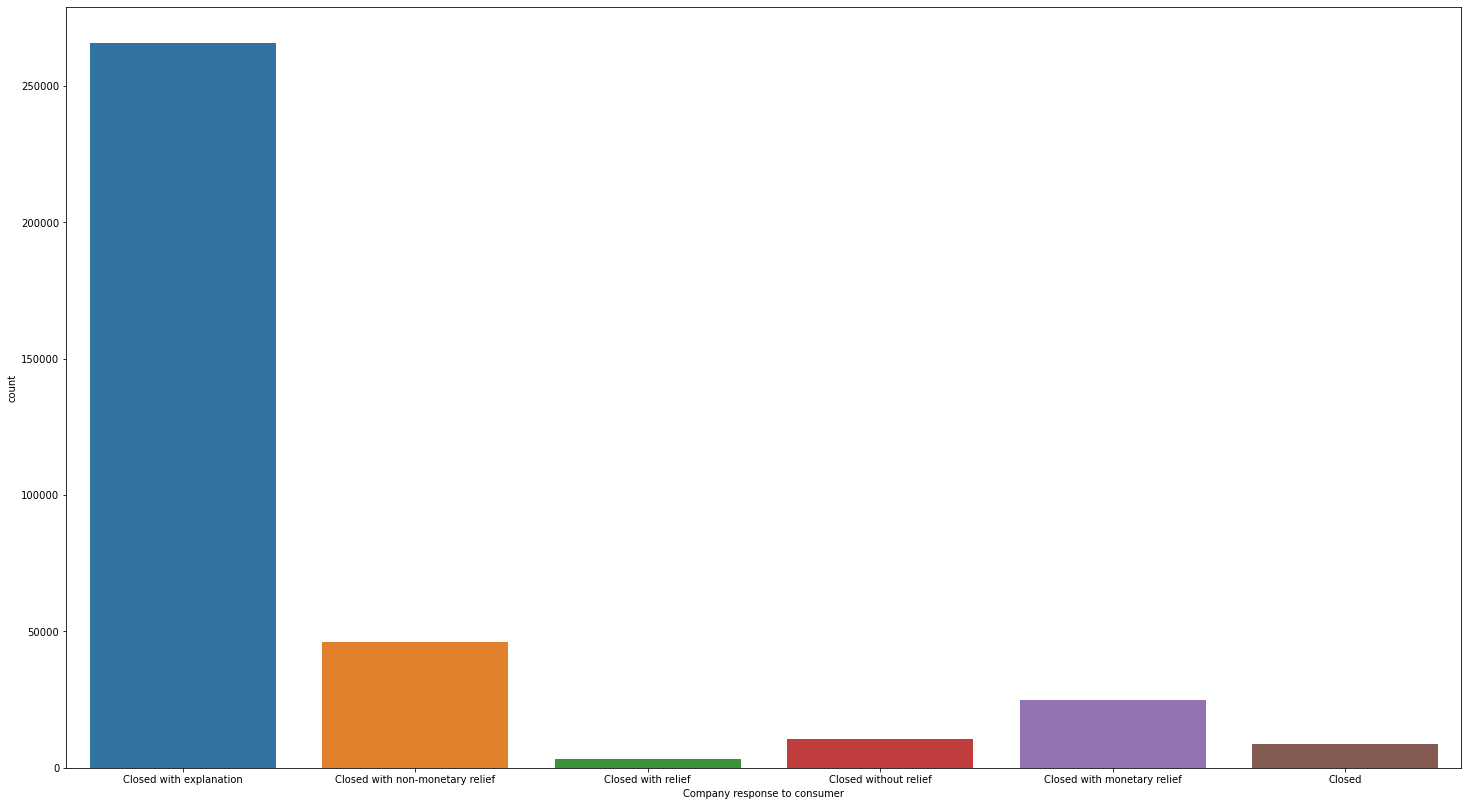

In [15]:
#Plot bar graph of the total no of disputes where the Company's Response to the Complaints
fig, ax = plt.subplots(figsize=(25, 14))
sns.countplot(x="Company response to consumer", data=train_data, ax=ax)
plt.show()

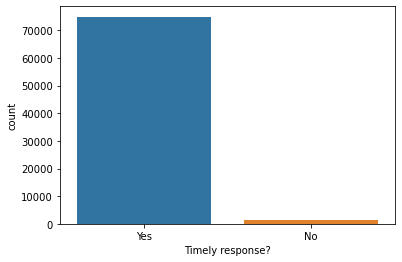

In [16]:
#Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response
disputed_data = train_data[train_data["Consumer disputed?"] == "Yes"]
sns.countplot(x="Timely response?", data=disputed_data)
plt.show()

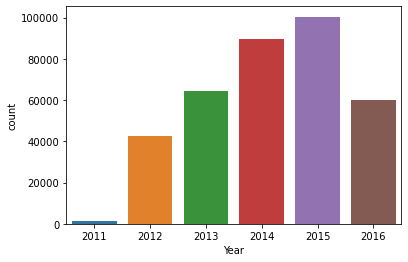

In [17]:

#Plot bar graph of the total no of disputes over Year Wise Complaints
sns.countplot(x="Year", data=train_data)
plt.show()

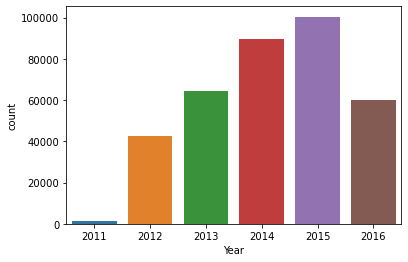

In [18]:
#Plot bar graph of the total no of disputes over Year Wise Disputes
sns.countplot(x="Year", data=train_data)
plt.show()

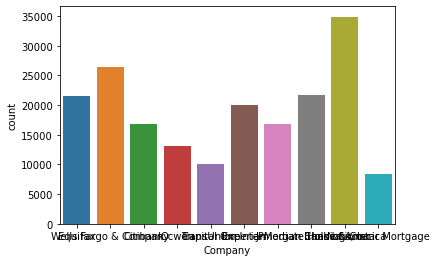

In [19]:
#Plot bar graph of Top Companies with Highest Complaints

top_companies = train_data["Company"].value_counts().head(10)
sns.countplot(x="Company", data=train_data[train_data["Company"].isin(top_companies.index)])
plt.show()

In [20]:
#Converte all negative days held to zero (it is the time taken by the authority that can't be negative)
train_data["days_held"] = train_data["days_held"].where(train_data["days_held"]>=0, 0)
test_data["days_held"]=test_data["days_held"].where(test_data["days_held"]>=0, 0)
train_data

,Date received,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Year,Day,days_held,week_received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,14,0,42
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,26,0,17
2,2013-12-20,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,20,14,51
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,3,1,9
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,30,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,4,2014,14,0,16
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,3,2013,14,4,11
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2,2013,1,0,5
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,6,2015,25,4,26


In [21]:
#Drop Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'
train_data = train_data.drop(columns=['Company', 'State', 'Year',"days_held"])
test_data = test_data.drop(columns=['Company', 'State', 'Year',"days_held"])
train_data

,Date received,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Day,week_received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,No,10,14,42
1,2015-04-26,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,Yes,4,26,17
2,2013-12-20,Credit card,Other,Phone,Closed with non-monetary relief,Yes,No,12,20,51
3,2016-03-03,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,No,3,3,9
4,2015-01-30,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,Yes,1,30,5
...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Web,Closed with non-monetary relief,Yes,No,4,14,16
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,No,3,14,11
358807,2013-02-01,Credit card,Payoff process,Web,Closed,Yes,Yes,2,1,5
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,No,6,25,26


In [22]:
#Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)
train_data["Consumer disputed?"] = train_data["Consumer disputed?"].map({"Yes": 1, "No": 0})


#check to make sure the mapping is correct
print(train_data["Consumer disputed?"].value_counts())


0    282638
1     76172
Name: Consumer disputed?, dtype: int64


In [23]:
train_data['Consumer disputed?'] = train_data['Consumer disputed?'].replace({"Yes": 1, "No": 0})
train_data

,Date received,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Day,week_received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,0,10,14,42
1,2015-04-26,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,1,4,26,17
2,2013-12-20,Credit card,Other,Phone,Closed with non-monetary relief,Yes,0,12,20,51
3,2016-03-03,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,0,3,3,9
4,2015-01-30,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1,1,30,5
...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Web,Closed with non-monetary relief,Yes,0,4,14,16
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,0,3,14,11
358807,2013-02-01,Credit card,Payoff process,Web,Closed,Yes,1,2,1,5
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,0,6,25,26


In [24]:
# Create dummy variables for categorical features
product_dummies = pd.get_dummies(train_data['Product'], prefix='Product')
submitted_via_dummies = pd.get_dummies(train_data['Submitted via'], prefix='Submitted_via')
company_response_dummies = pd.get_dummies(train_data['Company response to consumer'], prefix='Company_response')
timely_response_dummies = pd.get_dummies(train_data['Timely response?'], prefix='Timely_response')
#test_data
product_dummies = pd.get_dummies(test_data['Product'], prefix='Product')
submitted_via_dummies = pd.get_dummies(test_data['Submitted via'], prefix='Submitted_via')
company_response_dummies = pd.get_dummies(test_data['Company response to consumer'], prefix='Company_response')
timely_response_dummies = pd.get_dummies(test_data['Timely response?'], prefix='Timely_response')


In [25]:
## Concatenate dummy variables with the original dataframe
train_data = pd.concat([train_data, product_dummies, submitted_via_dummies, company_response_dummies, timely_response_dummies], axis=1)
test_data = pd.concat([test_data, product_dummies, submitted_via_dummies, company_response_dummies, timely_response_dummies], axis=1)
test_data

,Date received,Product,Issue,Submitted via,Company response to consumer,Timely response?,Month,Day,week_received,Product_Bank account or service,...,Submitted_via_Referral,Submitted_via_Web,Company_response_Closed,Company_response_Closed with explanation,Company_response_Closed with monetary relief,Company_response_Closed with non-monetary relief,Company_response_Closed with relief,Company_response_Closed without relief,Timely_response_No,Timely_response_Yes
0,2015-01-17,Credit card,Customer service / Customer relations,Web,Closed with monetary relief,Yes,1,17,3,0,...,0,1,0,0,1,0,0,0,0,1
1,2016-06-22,Consumer Loan,Payment to acct not credited,Phone,Closed with explanation,Yes,6,22,25,0,...,0,0,0,1,0,0,0,0,0,1
2,2015-09-04,Credit card,Credit line increase/decrease,Web,Closed with explanation,Yes,9,4,36,0,...,0,1,0,1,0,0,0,0,0,1
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,Web,Closed with non-monetary relief,Yes,5,17,20,0,...,0,1,0,0,0,1,0,0,0,1
4,2016-07-07,Debt collection,Improper contact or sharing of info,Web,Closed with explanation,Yes,7,7,27,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Web,Closed with explanation,Yes,2,9,7,0,...,0,1,0,1,0,0,0,0,0,1
119602,2012-11-13,Credit card,Balance transfer,Web,Closed with explanation,Yes,11,13,46,0,...,0,1,0,1,0,0,0,0,0,1
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed without relief,Yes,5,15,20,0,...,1,0,0,0,0,0,0,1,0,1
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,6,7,23,0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

C:\Users\Vishnu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
# Scale the data
train_data
#scaler = StandardScaler()
#train_data_scaled = scaler.fit_transform(train_data.drop(['Consumer disputed?'], axis=1))

,Date received,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Day,week_received,...,Submitted_via_Referral,Submitted_via_Web,Company_response_Closed,Company_response_Closed with explanation,Company_response_Closed with monetary relief,Company_response_Closed with non-monetary relief,Company_response_Closed with relief,Company_response_Closed without relief,Timely_response_No,Timely_response_Yes
0,2015-10-14,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,0,10,14,42,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,1,4,26,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013-12-20,Credit card,Other,Phone,Closed with non-monetary relief,Yes,0,12,20,51,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-03-03,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,0,3,3,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2015-01-30,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1,1,30,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Web,Closed with non-monetary relief,Yes,0,4,14,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,0,3,14,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358807,2013-02-01,Credit card,Payoff process,Web,Closed,Yes,1,2,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,0,6,25,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
train_data = train_data.select_dtypes(include=np.number)
train_data = train_data.dropna()
test_data = test_data.select_dtypes(include=np.number)
test_data = test_data.dropna()
test_data

,Month,Day,week_received,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Submitted_via_Referral,Submitted_via_Web,Company_response_Closed,Company_response_Closed with explanation,Company_response_Closed with monetary relief,Company_response_Closed with non-monetary relief,Company_response_Closed with relief,Company_response_Closed without relief,Timely_response_No,Timely_response_Yes
0,1,17,3,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,6,22,25,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,9,4,36,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,5,17,20,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,7,7,27,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2,9,7,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
119602,11,13,46,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
119603,5,15,20,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
119604,6,7,23,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [29]:
# Scale the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(['Consumer disputed?'], axis=1))

In [30]:

# Perform PCA
pca = PCA(.8)
train_data_scaled = pca.fit_transform(train_data_scaled)

In [31]:
# Split the data into X and Y
X = train_data_scaled
y = train_data['Consumer disputed?']



In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# Create a dictionary of models
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'AdaBoost': AdaBoostClassifier(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'KNN': KNeighborsClassifier(),
          'XGBoost': XGBClassifier()}

In [34]:
# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.7848424044812307
Decision Tree Accuracy: 0.7527798679040214
Random Forest Accuracy: 0.7515675946827188
AdaBoost Accuracy: 0.7847587994314856
Gradient Boosting Accuracy: 0.7847169969066131
KNN Accuracy: 0.7458824513000585


C:\Users\Vishnu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.7837137363096731


In [39]:
# Select the best model
best_model = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test)))
best_model


'Logistic Regression'

In [36]:
# Use the best model to predict the outcome for the test file

test_data_scaled = scaler.transform(test_data)
test_data_scaled = pca.transform(test_data_scaled)
test_data['Consumer disputed?'] = models[best_model].predict(test_data_scaled)

# Save the test data with the predicted outcome
test_data.to_csv("test_data_predicted.csv", index=False)